# Handling and Switching Dimensions

### Import plotastic, example Data and initialize DataAanalysis object

In [1]:
import plotastic as plst

# Import Example Data
DF, dims = plst.load_dataset("fmri", verbose=False)
DA = plst.DataAnalysis(DF, dims)
DA.data.head()

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
✅ GROUPS EQUAL: All groups (40 total) have the same samplesize n = 14.0.
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['region', 'event'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.


,Unnamed: 0,subject,timepoint,event,region,signal
0,17,s7,9,stim,parietal,0.058897
1,36,s8,9,stim,parietal,0.170227
2,67,s0,0,stim,frontal,-0.021452
3,84,s1,0,stim,parietal,-0.064454
4,127,s13,9,stim,parietal,0.013245


## Dims
 Dims Objects store `{x, y, hue, col, row}`. It also has the property `by` that is by default a list of `[row, col]`. This is needed to group the dataframe just as facetgrid does

#### Show Dimensions using `dims.as_dict()`

In [2]:
DA.dims  # Returns DA.dims.asdict().__repr__()
DA.dims.asdict()  # Returns dictionary

{'y': 'signal', 'x': 'timepoint', 'hue': 'event', 'row': None, 'col': 'region'}

#### Access Individual Dimensions by attribute

In [3]:
# DA.dims.y
# DA.dims.x
DA.dims.col

'region'

## Switching Dimensions
DIMS Objects can switch x, y, hue, col, row by changing the dims object either inplace or by generating a copy"

#### Switch col with hue
Dimensions must not have the same value. `DataAnalysis.switch`
automatically switches the dimensions and returns a copy of the DataAnalysis object

In [4]:
DA.switch("hue", "col")  # Takes strings as arguments

#! TEMPORARY CHANGING: Dims with keys: '('hue', 'col')' and kwarg: {'hue': 'region'}:
   (dim =	'old' -> 'new')
    y   =	'signal'
    x   =	'timepoint'
 >> hue =	'event' -> 'region'
    row =	None
  < col =	'region' -> 'event'


In [5]:
DA.switch(
    col="event"
)  #  Same result, but with kwargs. Hue is set automatically

#! TEMPORARY CHANGING: Dims with keys: '()' and kwarg: {'col': 'event'}:
   (dim =	'old' -> 'new')
    y   =	'signal'
    x   =	'timepoint'
  < hue =	'event' -> 'region'
    row =	None
 >> col =	'region' -> 'event'


In [6]:
DA.switch(hue="region")  # Same result as before,

#! TEMPORARY CHANGING: Dims with keys: '()' and kwarg: {'hue': 'region'}:
   (dim =	'old' -> 'new')
    y   =	'signal'
    x   =	'timepoint'
 >> hue =	'event' -> 'region'
    row =	None
  < col =	'region' -> 'event'


#### Switch Dimensions in chain

#! TEMPORARY CHANGING: Dims with keys: '('hue', 'col')' and kwarg: {'hue': 'region'}:
   (dim =	'old' -> 'new')
    y   =	'signal'
    x   =	'timepoint'
 >> hue =	'event' -> 'region'
    row =	None
  < col =	'region' -> 'event'


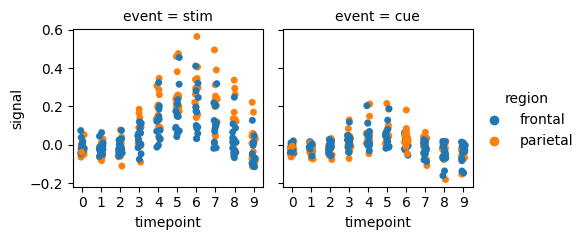

In [7]:
DA.switch("hue", "col").catplot()

#### Switching Dimensions does not change object by default!

region


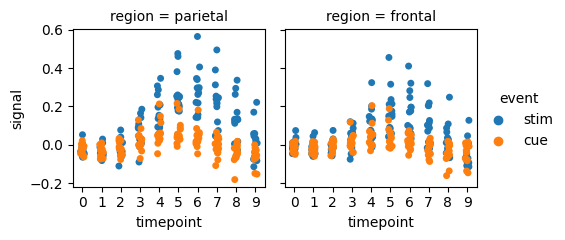

In [8]:
print(DA.dims.col)  # Remains as "region", just as defined during initialization
DA.catplot()

#### Use Inplace keyword

In [9]:
print(
    "'dims.col' before switching:",
    DA.dims.col,
)  # Returns "region"
col_inchain = DA.switch(col="event", inplace=False).dims.col
print("'dims.col' in chain:", col_inchain)  # Returns "event"
print(
    "'dims.col' after switching (inplace=False): ", DA.dims.col
)  # REMAINS as "region"

'dims.col' before switching: region
#! TEMPORARY CHANGING: Dims with keys: '()' and kwarg: {'col': 'event'}:
   (dim =	'old' -> 'new')
    y   =	'signal'
    x   =	'timepoint'
  < hue =	'event' -> 'region'
    row =	None
 >> col =	'region' -> 'event'
'dims.col' in chain: event
'dims.col' after switching (inplace=False):  region


In [10]:
col_inchain = DA.switch(col="event", inplace=True).dims.col
print("'dims.col' in chain: ", col_inchain)  # Returns "event"
print(
    "'dims.col' after switching (inplace=True): ",
    DA.dims.col,
)  # Returns "event"

#! RE-WRITING Dims with keys: '()' and kwarg: {'col': 'event'}:
   (dim =	'old' -> 'new')
    y   =	'signal'
    x   =	'timepoint'
  < hue =	'event' -> 'region'
    row =	None
 >> col =	'region' -> 'event'
'dims.col' in chain:  event
'dims.col' after switching (inplace=True):  event
